# <div align="center"> ASIIGNMENT 4</div>
## <div align="center"> GROUP 4 </div> 
### <div align="center">DINESH PATEL(23510032)(CONTRIBUTION:50%)</div>
### <div align="center">TARUN KUMAR(23510125)(CONTRIBUTION:50%)</div>


#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import mode

### Problem Setup

Let us define the given variables:
- $ N $: Total number of tosses
- $ h $: Number of heads observed
- $ N - h $: Number of tails observed

For the coin, we assume that the prior distribution of $ r $, the probability of heads, is uniform (uninformative prior), which is:

$$
\pi(r) = 1 \quad \text{for} \quad r \in [0, 1]
$$

We are given the data for 10 coin tosses $( N = 10 )$ with 7 heads $( h = 7 )$, so the number of tails is $ N - h = 3 $.

The posterior distribution for $ r $, based on this data, is given by:

$$
q(r | N, h) = \frac{r^h (1 - r)^{N - h}}{\text{Beta}(h + 1, N - h + 1)}
$$

where $\text{Beta}(a, b)$ is the Beta function, defined as:

$$
\text{Beta}(a, b) = \int_0^1 r^{a-1} (1 - r)^{b-1} \, dr
$$

For the given data, the posterior distribution becomes:

$$
q(r | 10, 7) = \frac{r^7 (1 - r)^3}{\text{Beta}(8, 4)}
$$


### a) Plot Overlay of the Prior Distribution  $\pi(r)$ and the Posterior Distribution $q(r | N, h)$

#### Prior Distribution
The prior distribution $\pi(r)$ is uniform, meaning all values of $ r $ between 0 and 1 are equally likely. Mathematically, this is expressed as:

$$
\pi(r) = 1 \quad \text{for} \quad r \in [0, 1]
$$

#### Posterior Distribution
The posterior distribution is derived from Bayes' Theorem and is proportional to the Beta distribution. In our case, for $ N = 10 $ and $ h = 7 $, the posterior is given by:

$$
q(r | 10, 7) = \frac{r^7 (1 - r)^3}{\text{Beta}(8, 4)}
$$

We will plot both the prior and the posterior distributions to see how the data updates our belief about $ r $.

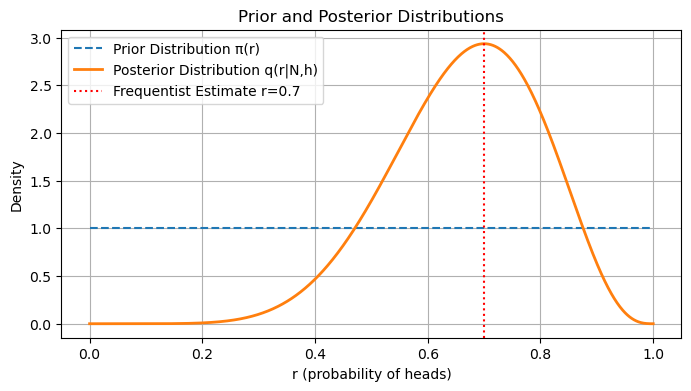

In [2]:
N = 10              # Total tosses
h = 7               # Number of heads
r_freq = h / N      # Frequentist estimate

# Define the prior and posterior distributions
r_values = np.linspace(0, 1, 1000)

# Prior distribution (uniform)
pi_r = np.ones_like(r_values)

# Posterior distribution using the Beta distribution
posterior = beta.pdf(r_values, h + 1, N - h + 1)

# Plot prior and posterior
plt.figure(figsize=(8,4))
plt.plot(r_values, pi_r, label='Prior Distribution π(r)', linestyle='--')
plt.plot(r_values, posterior, label='Posterior Distribution q(r|N,h)', linewidth=2)
plt.axvline(x=r_freq, color='r', linestyle=':', label=f'Frequentist Estimate r={r_freq}')
plt.xlabel('r (probability of heads)')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions')
plt.legend()
plt.grid(True)
plt.show()

### b) Calculate the MAP Estimate $(r_{\text{MAP}})$ and the Expectation Value $\langle r \rangle$

#### Frequentist Estimate
The **frequentist estimate** of \( r \) is simply the ratio of heads to the total number of tosses. It is calculated as:

$$
r_{\text{freq}} = \frac{h}{N}
$$

---

#### 1. Mean (Expectation Value) $ \langle r \rangle $ 

The expectation value of $ r $ under the posterior distribution is given by:

$$
\langle r \rangle = \sum_{i} r_i \cdot P(r_i)
$$

Where:
- $ r_i $ are the values of $ r $,
- $ P(r_i) $ are the posterior probabilities corresponding to each $ r_i $,

---

#### 2. MAP Estimate $ r_{\text{MAP}} $

The MAP estimate is the value of $ r $ that maximizes the posterior probability:

$$
r_{\text{MAP}} = \text{argmax}_i \, P(r_i)
$$

---

In [3]:
# -- Frequentist estimate
r_freq = h/N

# Expectation value
posterior_normalize = posterior/np.sum(posterior)
mean_r = np.sum(r_values *posterior_normalize)

# MAP estimate
r_map = r_values[np.argmax(posterior)]

print(f"Frequentist Estimate r_freq: {r_freq}")
print(f"Expectation Value (Mean): {mean_r}")
print(f"MAP Estimate: {r_map}")

Frequentist Estimate r_freq: 0.7
Expectation Value (Mean): 0.6666666666703479
MAP Estimate: 0.6996996996996997


#### -- c) 90% credible interval 

In [4]:
lower_bound = beta.ppf(0.05, h + 1, N - h + 1)
upper_bound = beta.ppf(0.95, h + 1, N - h + 1)

print(f"90% Symmetric Credible Interval: ({lower_bound:.3f}, {upper_bound:.3f})")

90% Symmetric Credible Interval: (0.436, 0.865)


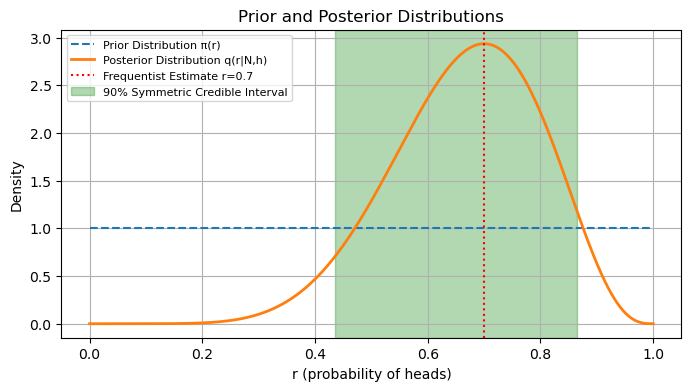

In [5]:
plt.figure(figsize=(8,4))
plt.plot(r_values, pi_r, label='Prior Distribution π(r)', linestyle='--')
plt.plot(r_values, posterior, label='Posterior Distribution q(r|N,h)', linewidth=2)
plt.axvline(x=r_freq, color='r', linestyle=':', label=f'Frequentist Estimate r={r_freq}')
plt.axvspan(lower_bound ,upper_bound , color='green', label=f'90% Symmetric Credible Interval' , alpha = 0.3)
plt.xlabel('r (probability of heads)')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions')
plt.legend(fontsize = 8)
plt.grid(True)
plt.show()

### d) What is the Probability that the Data Set is the Result of Tossing a Fair Coin $ (r = 0.5) $?

The probability that the data is consistent with the coin being fair ($ i.e.,  r = 0.5 4 $ ) can be computed by evaluating the posterior distribution at $ r = 0.5 $:

$$
\text{Probability at } r = 0.5 = q(0.5 | N, h)
$$

This represents the likelihood of observing the data given that the probability of heads is 0.5.

In [6]:
a = h + 1           # Alpha 
b = N - h + 1       # Beta 
interval = 0.01     # Interval width

# Compute probability in a small interval around r = 0.5
probability_around_0_5 = beta.cdf(0.5 + interval / 2, a, b) - beta.cdf(0.5 - interval / 2, a, b)

print(f"Probability in interval around r = 0.5: {probability_around_0_5:.4f}")


Probability in interval around r = 0.5: 0.0129


### e )Simulation and Posterior Probability Density Analysis

- **Task**: Plot the posterior probability density for \( N = 10, 100, 1000, 10000, 100000 \) coin tosses of an unfair coin with \( r = 0.65 \).  
- **Steps**: Write a function to simulate coin tosses and compute posterior distributions.  
- **Observation**: Analyze how the posterior distribution evolves as more data is assimilated to infer \( r \).  

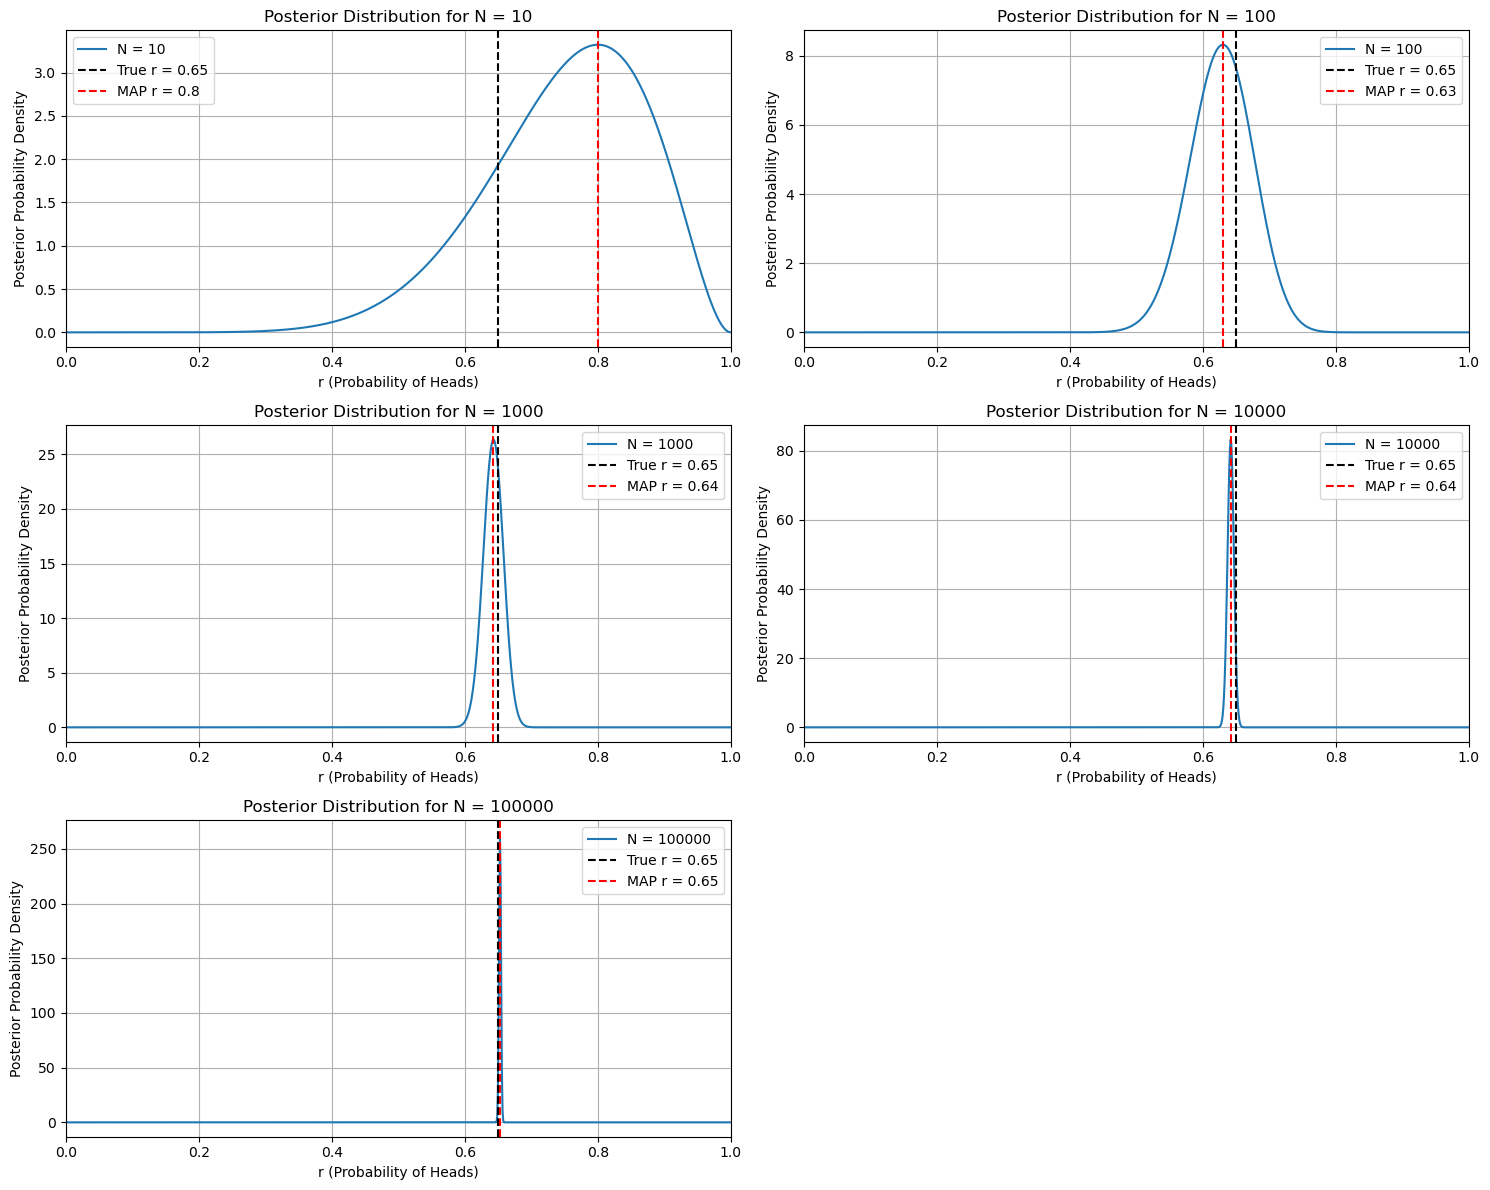

In [7]:
# Function to simulate coin tosses
def simulate_coin_tosses(N, p=0.65):
    return np.random.choice([0, 1], size=N, p=[1 - p, p])

def posterior_distribution(h, N, r_values):
    return beta.pdf(r_values, h + 1, N - h + 1)

# Function to find the number of tosses required for 5% accuracy
def tosses_for_accuracy(target_accuracy, true_r=0.65):
    """Finds the minimum number of tosses required to achieve the target accuracy."""
    N = 10  # Start with 10 tosses and increase
    while True:
        # Simulate N tosses
        tosses = simulate_coin_tosses(N, true_r)
        h = np.sum(tosses)  # Number of heads
        
        # Compute the credible interval
        lower_bound = beta.ppf(0.05, h + 1, N - h + 1)
        upper_bound = beta.ppf(0.95, h + 1, N - h + 1)
        interval_width = upper_bound - lower_bound
        
        # If the width of the interval is less than the target accuracy, stop
        if interval_width <= target_accuracy:
            return N
        N += 10  # Increase the number of tosses and try again


r_values = np.linspace(0, 1, 1000)
N_values = [10, 100, 1000, 10000, 100000]
true_r = 0.65

# Create subplots for the posterior distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for i, N in enumerate(N_values):
    # Simulate coin tosses for the given N
    tosses = simulate_coin_tosses(N, true_r)
    h = np.sum(tosses)  # Number of heads
    
    # Compute the posterior distribution
    posterior = posterior_distribution(h, N, r_values)
    map_r = r_values[np.argmax(posterior)]
    # Plot the posterior distribution
    axes[i].plot(r_values, posterior, label=f'N = {N}')
    axes[i].axvline(true_r, color='black', linestyle='--', label='True r = 0.65')
    axes[i].axvline(map_r, color='red', linestyle='--', label=f'MAP r = {round(map_r,2)}')
    axes[i].set_xlabel('r (Probability of Heads)')
    axes[i].set_xlim(0, 1)
    axes[i].set_ylabel('Posterior Probability Density')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].set_title(f'Posterior Distribution for N = {N}')

# Adjust layout and remove any empty subplot
for j in range(len(N_values), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

### Observations:
- As the number of datasets increases, the posterior distribution converges towards the probability of the unfair coin, becoming symmetric around this value. Additionally, as the number of samples grows, the$( r_{\text{MAP}}$) aligns closely with the true$( r$) value..

#### --f)  Calculate the number of tosses for 5% accuracy

In [8]:
required_tosses = tosses_for_accuracy(0.05, true_r)
print(f'Required No. of tosses to estimate r with 5% accuracy is = {required_tosses}')

Required No. of tosses to estimate r with 5% accuracy is = 970


# Question 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, entropy

# Detailed Balance Equation

The detailed balance equation for a Markov chain is:

$$
\pi(i) P(i, j) = \pi(j) P(j, i) \quad \forall \, i, j
$$

Where:
<div align="center">
  Stationary probability of being in state \(i\).
</div> $$ \pi(i) $$
<div align="center">
    Transition probability from state \(i\) to state \(j\)
</div>    
    
- $$ P(i, j) $$
- <div align="center">
Transition probability from state \(i\) to state \(j\)
</div>
- $$ P(j, i) $$

---

## Meaning of Detailed Balance

### 1. Stationarity and Symmetry
A Markov chain satisfies detailed balance if, at equilibrium, the flow of probability from state \(i\) to \(j\) equals the flow from \(j\) to \(i\). This means that the probability of transitioning into a state is balanced by the probability of transitioning out of it for every pair of states.

### 2. Reversible Markov Chains
Detailed balance implies that the Markov chain is **time-reversible**. This means that the process looks statistically identical if you run it forward or backward in time.

### 3. Relation to Equilibrium
If a Markov chain satisfies the detailed balance condition, π is its stationary distribution, and the chain is at equilibrium. At this point, the system does not exhibit a net flow of probability between states.

---

## Physical Analogy

In thermodynamics, detailed balance is analogous to a system in **thermal equilibrium**. For example, in a gas at equilibrium, the number of molecules moving from one energy state to another equals the number moving in the opposite direction.

---
- **Another example**: 

Physically, this can be understood through the analogy of traffic flow in a city. If each borough represents a state in the chain, and the roads (edges) represent transitions, then detailed balance implies that the number of cars entering and exiting any borough (state) through a specific road (edge) is balanced. This results in no net change in the number of cars in any borough over time. In contrast, a stationary distribution ensures that the total inflow and outflow of cars in each borough are balanced, but it doesn’t guarantee balance at the level of individual roads or bridges.

Thus, detailed balance is a stronger condition than mere stationarity, as it requires that the probability fluxes be balanced locally (at each edge), whereas stationarity only requires global balance at each state.


## Applications

- **Monte Carlo Simulations**: Algorithms like Metropolis-Hastings rely on detailed balance to ensure convergence to the stationary distribution.
- **Physics**: Models of particle interactions often assume detailed balance in equilibrium systems.
- **Chemistry**: Reaction rates in reversible chemical reactions often satisfy detailed balance at equilibrium.

---

## Example

In a two-state system with states \(A\) and \(B\), suppose:

$$
\pi(A) = 0.4, \quad \pi(B) = 0.6, \quad P(A, B) = 0.5, \quad P(B, A) = 0.333
$$

Then, detailed balance is satisfied because:

$$
\pi(A) P(A, B) = 0.4 \times 0.5 = 0.2, \quad \pi(B) P(B, A) = 0.6 \times 0.333 = 0.2
$$
**References**
- https://personal.math.ubc.ca/~holmescerfon/teaching/asa22/handout-Lecture3_2022.pdf
- https://en.wikipedia.org/wiki/Detailed_balance


---

## PART b

### To show that \( q \) is a stationary distribution of a Markov chain \( X \) satisfying detailed balance:

We need to prove that:

$$
\sum_i q(i) P(i, j) = q(j) \quad \forall j,
$$

where $ P(i, j) $ is the transition probability from state $ i $ to state $ j $, and $ q(i) $ is the probability of being in state $ i $ in the stationary distribution.

#### Using Detailed Balance:

Given that the chain satisfies detailed balance:

$$
q(i) P(i, j) = q(j) P(j, i) \quad \forall i, j.
$$

#### Step 1: Sum over all states $ i $

To check stationarity, we sum the left-hand side over all $ i $:

$$
\sum_i q(i) P(i, j).
$$

#### Step 2: Substitute detailed balance into the summation

Using the detailed balance equation $ q(i) P(i, j) = q(j) P(j, i) $, we can rewrite:

$$
\sum_i q(i) P(i, j) = \sum_i q(j) P(j, i).
$$

#### Step 3: Factor \( q(j) \) outside the summation

Since $ q(j) $ does not depend on $ i $, it can be factored out:

$$
\sum_i q(i) P(i, j) = q(j) \sum_i P(j, i).
$$

#### Step 4: Use the normalization of transition probabilities

The transition probabilities $ P(j, i) $ must sum to 1 over all $ i $ (by definition of a Markov chain):

$$
\sum_i P(j, i) = 1.
$$

Thus:

$$
\sum_i q(i) P(i, j) = q(j) \cdot 1 = q(j).
$$

#### Conclusion:

We have shown that:

$$
\sum_i q(i) P(i, j) = q(j) \quad \forall j,
$$

which means \( q \) satisfies the stationarity condition. Therefore, \( q \) is a stationary distribution of the Markov chain.


---

### The Ehrenfest Model: Markov Chain and Transition Probabilities

The Ehrenfest model describes a process where molecules move randomly between two sides of a permeable membrane. The state \( X(t) \) represents the number of molecules on the left side at time \( t \). We will argue that \( X(t) \) is a Markov chain and derive the transition probabilities.

#### Definition of a Markov Chain:
A stochastic process \( X(t) \) is a Markov chain if the future state \( X(t+1) \) depends only on the current state \( X(t) \), not on the history of previous states. Formally:

$$
P(X(t+1) = j \mid X(t) = i, X(t-1), \dots, X(0)) = P(X(t+1) = j \mid X(t) = i).
$$

#### Argument for Markov Property:

- **State Definition**: At any time \( t \), the state \( X(t) = i \) fully specifies the system: the number of molecules on the left-hand side. The exact positions or identities of the molecules are irrelevant; only the count matters.
  
- **Random Movement**: At each time step, a single molecule is chosen at random:
  - If it is on the left, it moves to the right.
  - If it is on the right, it moves to the left.
  
The choice of which molecule moves depends only on the current number of molecules on the left (\( i \)) and the total number of molecules (\( N \)).

#### Transition Probabilities:

- **Increase by 1**: If a molecule from the right side moves to the left, \( X(t+1) = i + 1 \).
  
  The number of molecules on the right side is \( N - i \). The probability of choosing one of these \( N - i \) molecules is:

  $$
  K(i, i+1) = \frac{N - i}{N} = 1 - \frac{i}{N}.
  $$

- **Decrease by 1**: If a molecule from the left side moves to the right, \( X(t+1) = i - 1 \).
  
  The number of molecules on the left side is \( i \). The probability of choosing one of these \( i \) molecules is:

  $$
  K(i, i-1) = \frac{i}{N}.
  $$

- **Stay within \( i-1 \) or \( i+1 \)**: Since exactly one molecule moves at each step, \( X(t+1) \) cannot jump to other states. Thus:

  $$
  K(i, j) = 0 \quad \text{for} \quad j \notin \{i+1, i-1\}.
  $$

#### Summary of Transition Probabilities:

- $$ ( K(i, i+1) = 1 - \frac{i}{N} ) (Transition \ to ( i+1)). $$
- $$ ( K(i, i-1) = \frac{i}{N}) (Transition \ to \ ( i-1 )). $$
- $$ ( K(i, j) = 0) for \ ( j \notin \{i+1, i-1\} ). $$


## PART c (i)

# Markov Chain Definition

A stochastic process \( X(t) \) is a Markov chain if the future state \( X(t+1) \) depends only on the current state \( X(t) \), not on the history of previous states. Formally:

$$
P(X(t+1) = j \mid X(t) = i, X(t-1), \dots, X(0)) = P(X(t+1) = j \mid X(t) = i)
$$

At any time \( t \), the state \( X(t) = i \) fully specifies the system: the number of molecules on the left-hand side. The exact positions or identities of the molecules are irrelevant; only the count matters. At each time step, a single molecule is chosen at random:

- If it is on the left, it moves to the right.
- If it is on the right, it moves to the left.

## Transition Probabilities

### Increase by 1
If a molecule from the right side moves to the left, \( X(t+1) = i + 1 \).

The number of molecules on the right side is \( N - i \). The probability of choosing one of these \( N - i \) molecules is:

$$
K(i, i+1) = \frac{N - i}{N} = 1 - \frac{i}{N}
$$

### Decrease by 1
If a molecule from the left side moves to the right, \( X(t+1) = i - 1 \).

The number of molecules on the left side is \( i \). The probability of choosing one of these \( i \) molecules is:

$$
K(i, i-1) = \frac{i}{N}
$$

### Transition to Other States
Since exactly one molecule moves at each step, \( X(t+1) \) cannot jump to states other than \( i+1 \) or \( i-1 \). Thus:

$$
K(i, j) = 0 \quad \text{for} \quad j \notin \{i+1, i-1\}
$$


## PART C (ii)

### Proof that the Stationary Distribution of the Ehrenfest Model is Binomial(N, 1/2)

The Ehrenfest model describes a Markov chain where the state \( X \) represents the number of particles on one side of a permeable membrane. The transition probabilities between states $ i \to i+1 $ and $ i \to i-1 $ are given by:

- $$ P(i \to i+1) = 1 - \frac{i}{N} $$
- $$ P(i \to i-1) = \frac{i}{N} $$

#### Stationary Distribution Condition

At stationarity, the flow into and out of any state \( i \) must balance. This is the detailed balance condition:
$$
q(i) P(i \to i+1) = q(i+1) P(i+1 \to i),
$$
where \( q(i) \) is the stationary probability of being in state \( i \).

Substitute the transition probabilities into the equation:
$$
q(i) \left(1 - \frac{i}{N}\right) = q(i+1) \frac{i+1}{N}.
$$

Rearrange to get:
$$
\frac{q(i+1)}{q(i)} = \frac{N - i}{i + 1}.
$$

#### Recursive Solution

Now solve recursively starting from \( q(0) \):

- $$ q(1) = q(0) \cdot \frac{N}{1} $$
- $$ q(2) = q(1) \cdot \frac{N - 1}{2} = q(0) \cdot \frac{N}{1} \cdot \frac{N-1}{2} $$
- $$ \dots $$
- $$ q(i) = q(0) \cdot \frac{N!}{i! (N-i)!} $$

Recognizing the factorial terms, this simplifies to:
$$
q(i) = q(0) \cdot \binom{N}{i}.
$$

#### Normalization Condition

The stationary probabilities must sum to 1:
$$
\sum_{i=0}^N q(i) = 1 \quad \Rightarrow \quad q(0) \sum_{i=0}^N \binom{N}{i} = 1.
$$
Using the binomial theorem:
$$
\sum_{i=0}^N \binom{N}{i} = 2^N.
$$
Thus:
$$
q(0) = \frac{1}{2^N}.
$$

The stationary distribution is therefore:
$$
q(i) = \frac{1}{2^N} \binom{N}{i}.
$$

This is exactly the Binomial distribution $ \text{Binomial}(N, 1/2) $, where:
$$
q(i) = P(X = i) = \binom{N}{i} \left(\frac{1}{2}\right)^i \left(\frac{1}{2}\right)^{N-i}.
$$

### Conclusion

The stationary distribution for the number of particles on one side of the container in the Ehrenfest model is Binomial(N, 1/2).


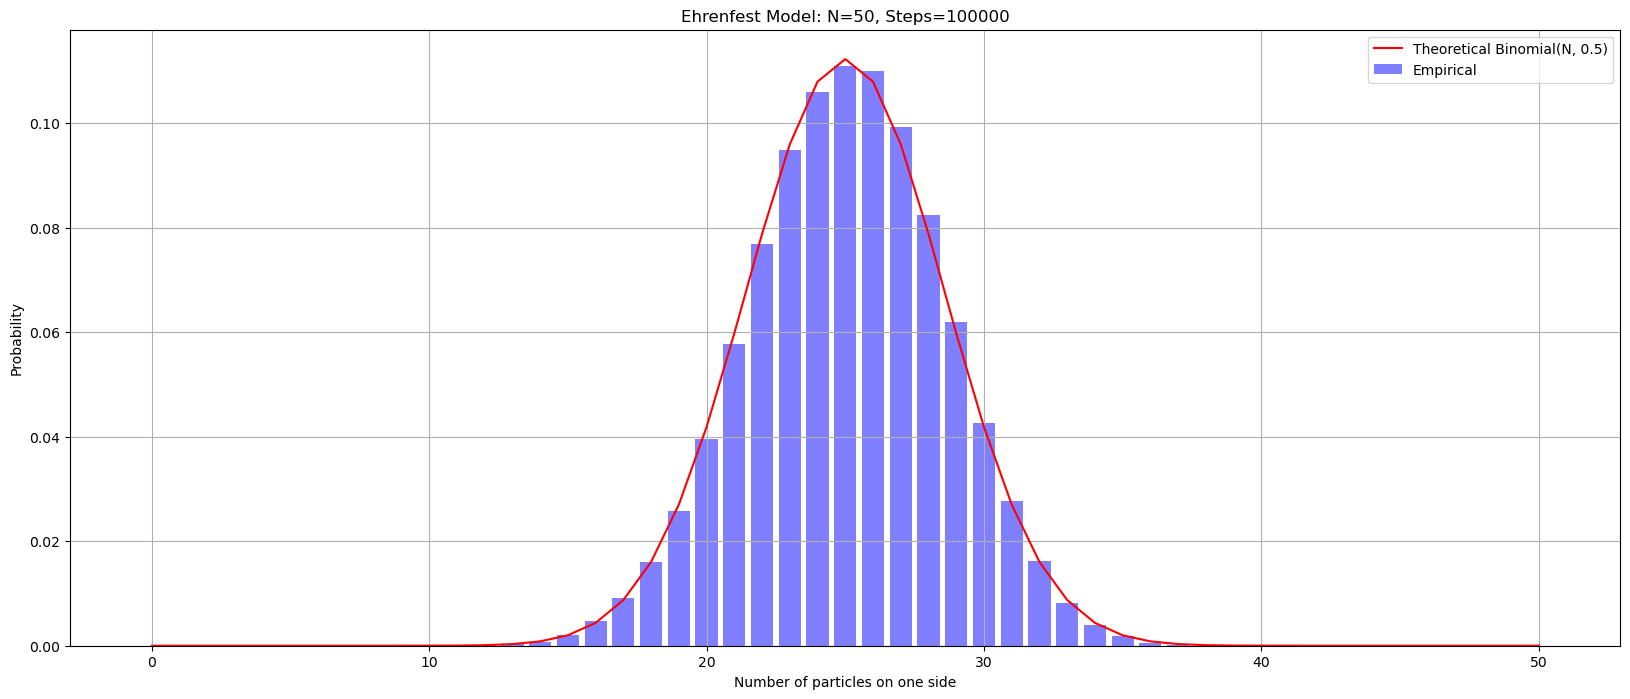

In [10]:
# Parameters
N = 50                        # Number of particles
steps = 100000                # Number of steps
X = 0                         # Initial state
counts = np.zeros(N + 1)      # Count occurrences of each state

# Simulate the Markov chain
for _ in range(steps):
    if np.random.rand() < (N - X) / N:
        X += 1  # Move particle to the left
    else:
        X -= 1  # Move particle to the right
    counts[X] += 1

# Normalize counts to get empirical probabilities
empirical_probs = counts / steps

# Theoretical binomial distribution
k = np.arange(N + 1)
theoretical_probs = binom.pmf(k, N, 0.5)

# Plot results
plt.figure(figsize = (20,8))
plt.bar(k, empirical_probs, alpha=0.5, color='blue', label="Empirical")
plt.plot(k, theoretical_probs, 'r-', label="Theoretical Binomial(N, 0.5)")
plt.xlabel("Number of particles on one side")
plt.ylabel("Probability")
plt.title(f"Ehrenfest Model: N={N}, Steps={steps}")
plt.legend()
plt.grid()
plt.show()


## Part c (iii)

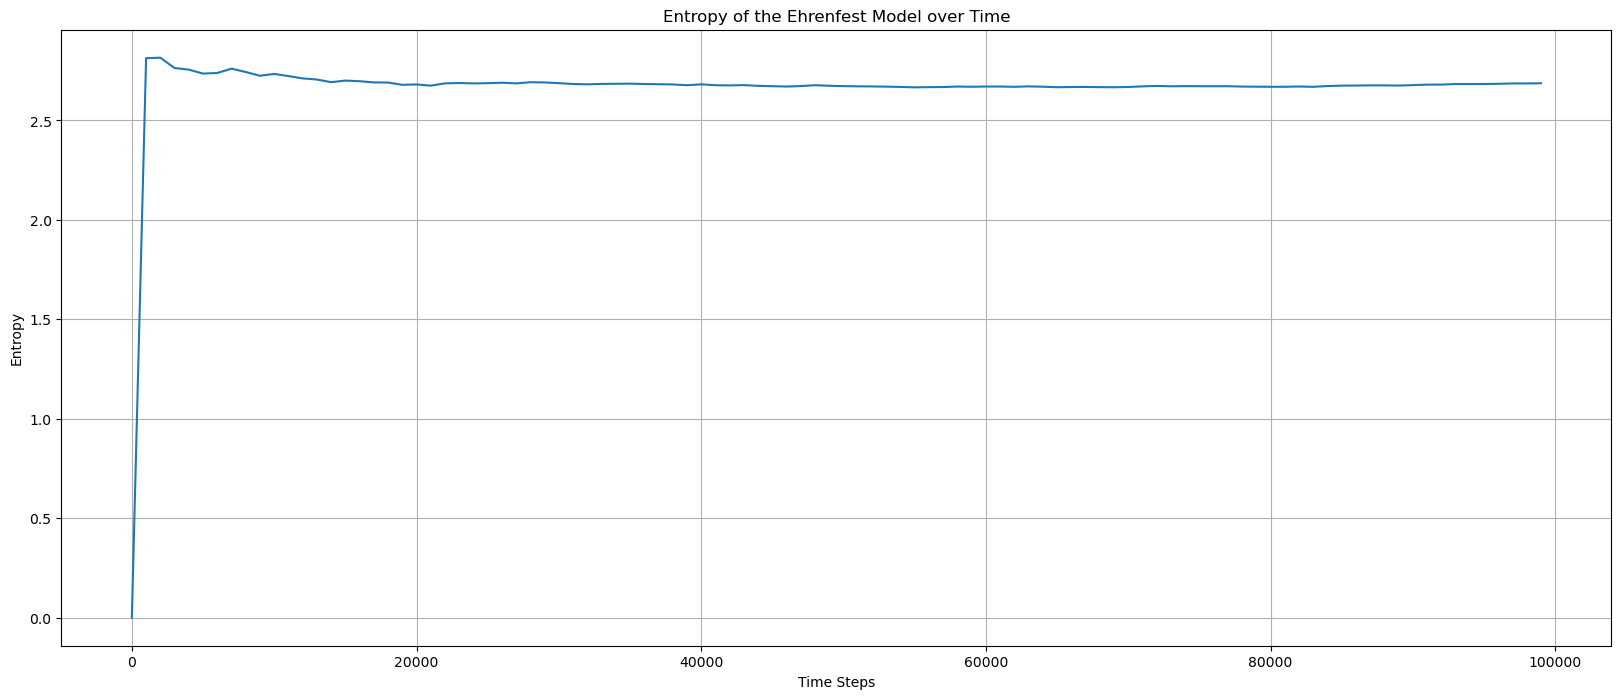

In [11]:
# Parameters
N = 50                          # Number of particles
steps = 100000                  # Number of steps
X = 0                           # Initial state
counts = np.zeros(N + 1)        # Count occurrences of each state
entropy_values = []             # To store entropy at each step


# Simulate the Markov chain
for step in range(steps):
    if np.random.rand() < (N - X) / N:
        X += 1  # Move particle to the left
    else:
        X -= 1  # Move particle to the right
    counts[X] += 1

    # Calculate the empirical probabilities
    empirical_probs = counts / (step + 1)

    # Calculate the entropy
    entropy = -np.sum(empirical_probs * np.log(empirical_probs + 1e-10))  # Added small value to avoid log(0)
    
    # Store entropy at every 1000th step for plotting
    if step % 1000 == 0:
        entropy_values.append(entropy)
        
plt.figure(figsize = (20,8))
# Plot the entropy over time
plt.plot(np.arange(0, steps, 1000), entropy_values)
plt.xlabel('Time Steps')
plt.ylabel('Entropy')
plt.title('Entropy of the Ehrenfest Model over Time')
plt.grid()
plt.show()


### The "Arrow of Time" in the Ehrenfest Model

The **"arrow of time"** refers to the movement of a system towards equilibrium, reflecting the transition from a state of low entropy to one of higher entropy. In the context of the Ehrenfest model, this concept is illustrated by the behavior of particles diffusing between two sides of a container. Initially, when the particles are concentrated on one side (low entropy), the system is far from equilibrium. As time progresses, the particles move more randomly, and the system's entropy increases.

As the simulation runs, the empirical distribution of the number of particles on each side of the container will evolve. Over time, the system will approach its equilibrium state, where the number of particles is more evenly distributed between the two sides. This transition reflects the **second law of thermodynamics**, which states that the entropy of a closed system tends to increase until it reaches a maximum at equilibrium.

Eventually, the system's state distribution will resemble a **binomial distribution** (in the limit of large \(N\)), and the fluctuations in the number of particles on each side become more balanced. This process demonstrates the **arrow of time** in a statistical mechanics context, as the system naturally moves towards a state of greater disorder and higher entropy.

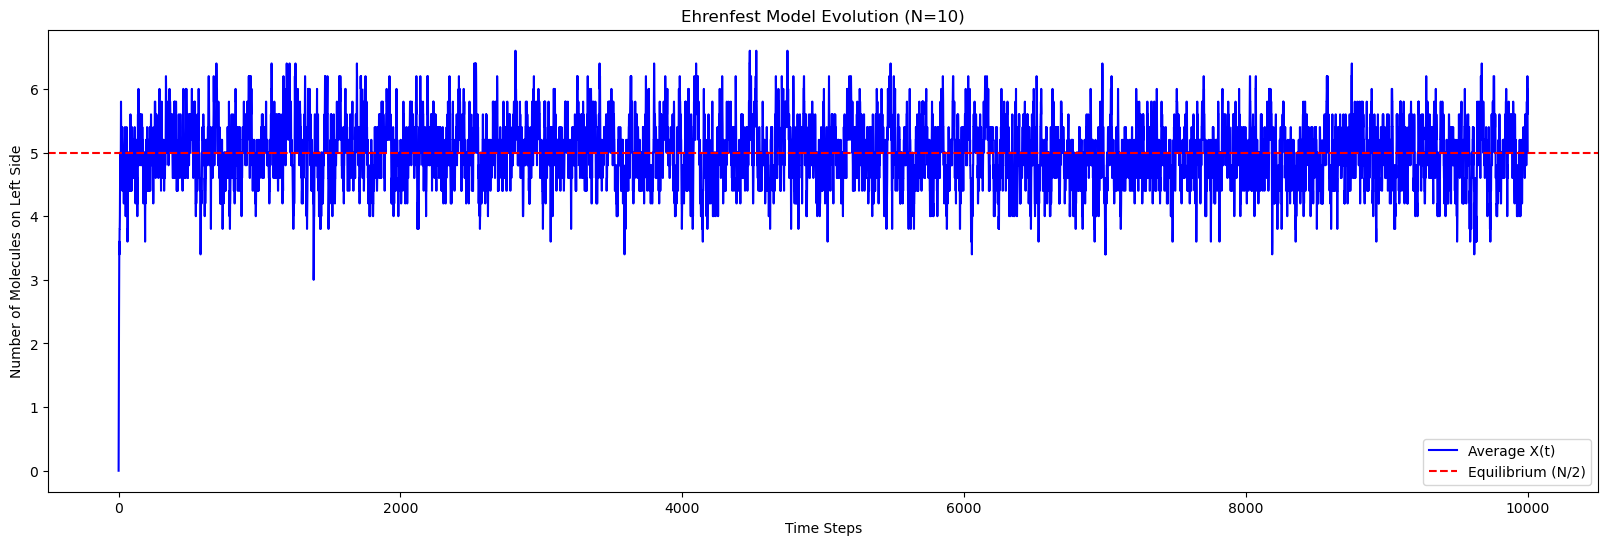

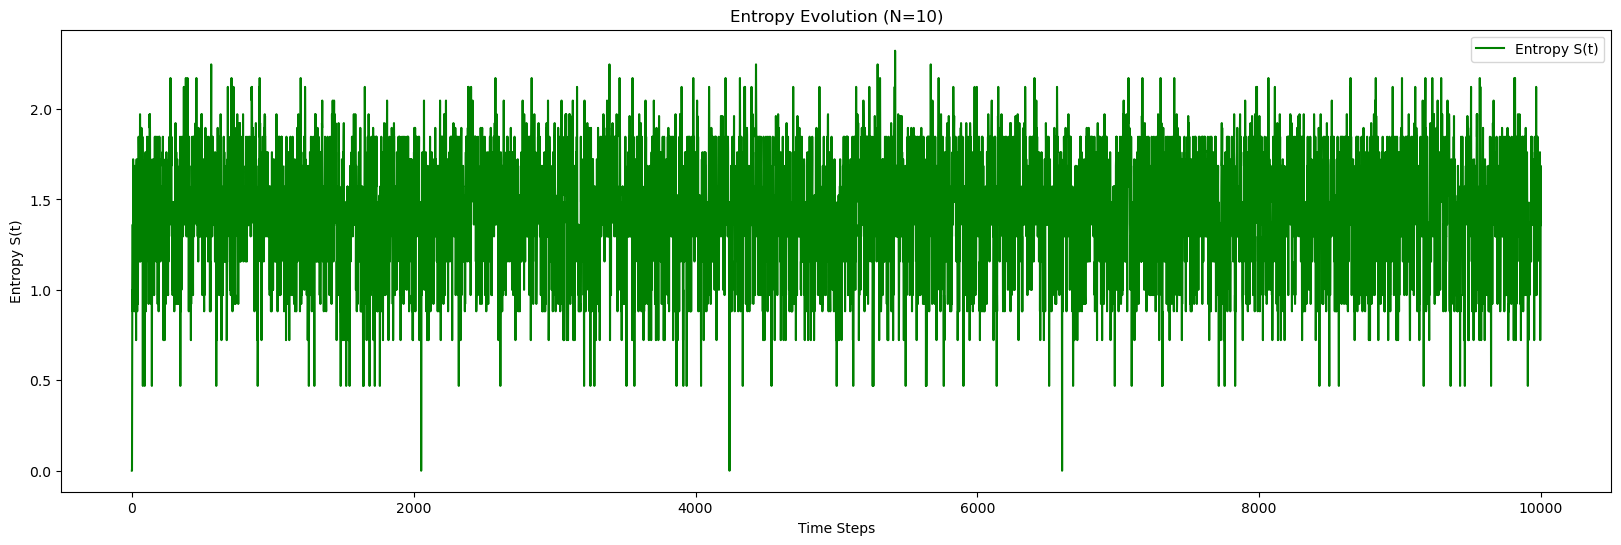

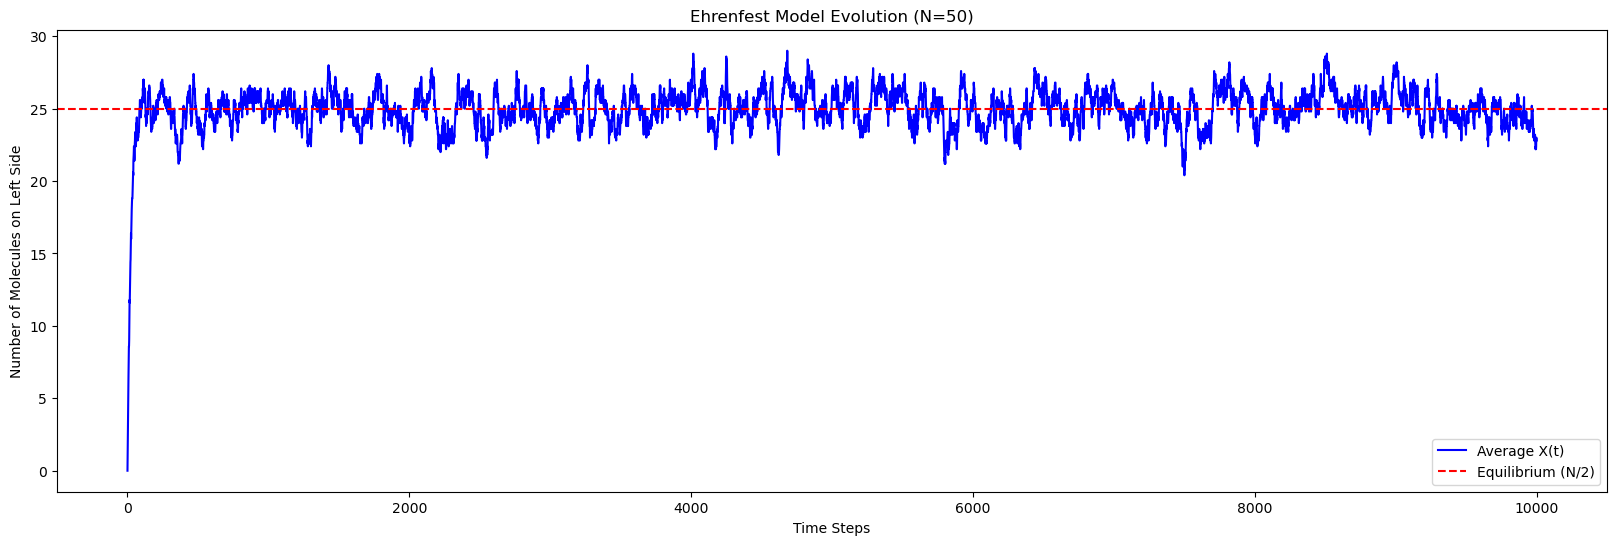

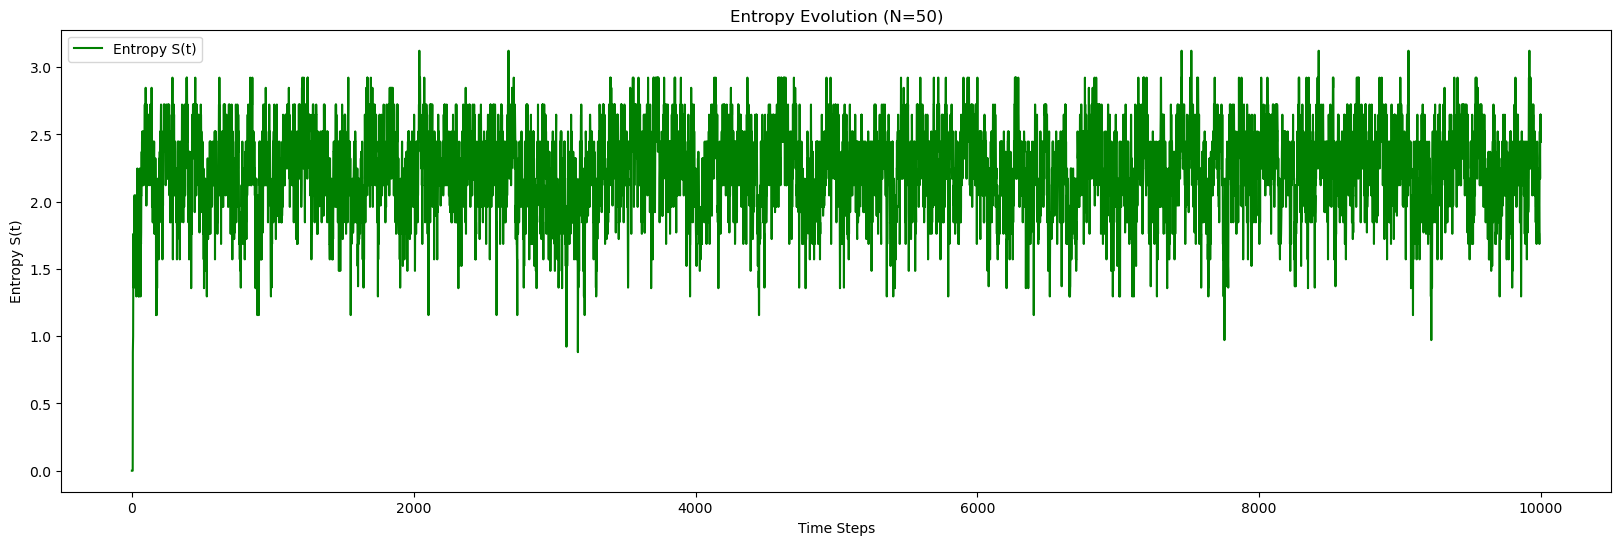

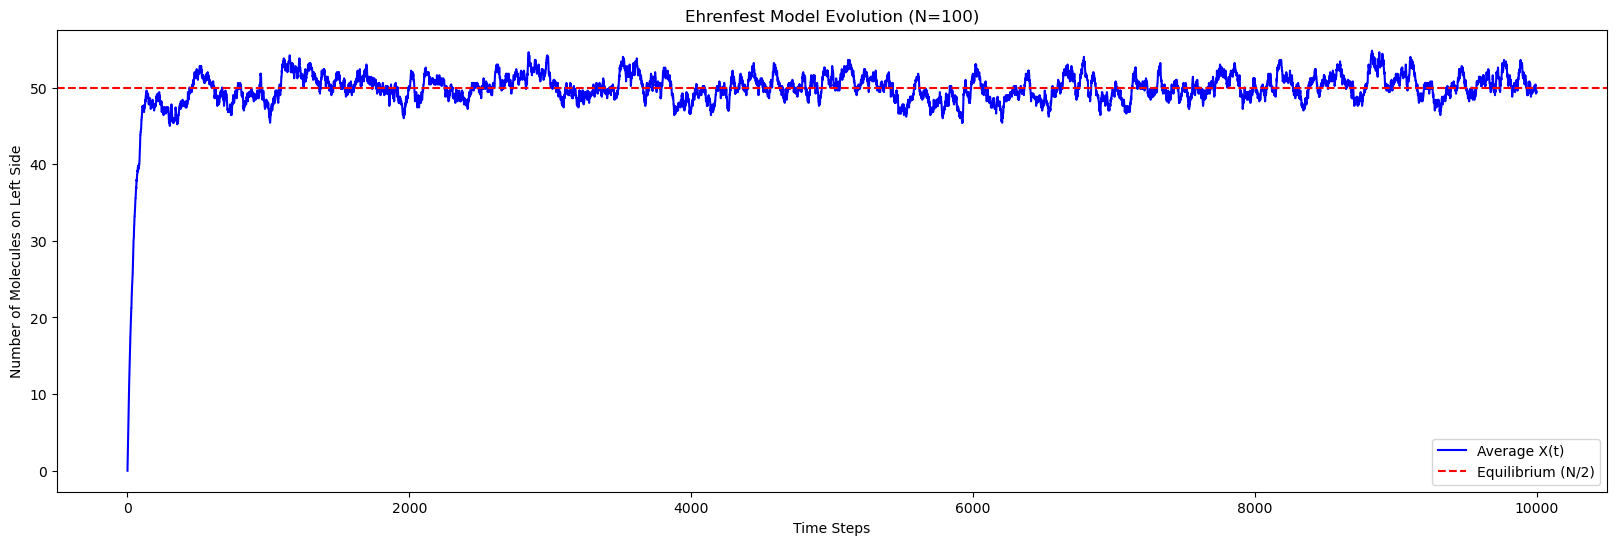

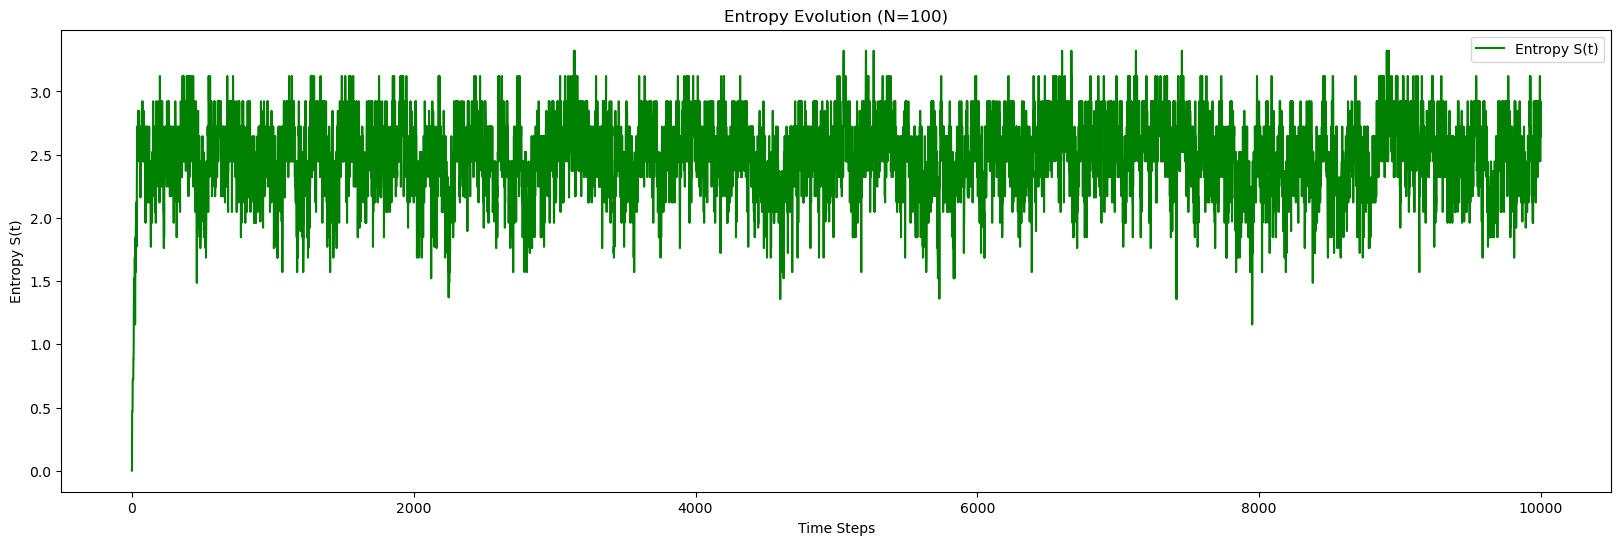

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy, binom

# Simulation Parameters
N_values = [10, 50, 100]       # Different N values
time_steps = 10000
num_realizations = 10          # Number of realizations for averaging
initial_state = 0 

for N in N_values:
    all_states = np.zeros((num_realizations, time_steps))  # To store states

    for r in range(num_realizations):
        state = initial_state
        for t in range(time_steps):
            # Store current state
            all_states[r, t] = state
            
            # Move molecule
            if np.random.rand() < state / N:  # Probability of moving left -> right
                state -= 1
            else:  # Probability of moving right -> left
                state += 1
    
    # Average over realizations
    avg_states = np.mean(all_states, axis=0)

    # Theoretical stationary distribution
    theoretical_probs = binom.pmf(range(N + 1), N, 0.5)

    # Plot evolution of the system
    plt.figure(figsize=(20, 6))
    plt.plot(range(time_steps), avg_states, label='Average X(t)', color='blue')
    plt.axhline(N / 2, color='red', linestyle='--', label='Equilibrium (N/2)')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Molecules on Left Side')
    plt.title(f'Ehrenfest Model Evolution (N={N})')
    plt.legend()
    plt.show()

    # Plot entropy evolution
    entropy_values = []
    for t in range(time_steps):
        state_counts = np.bincount(all_states[:, t].astype(int), minlength=N + 1)
        probabilities = state_counts / num_realizations
        entropy_values.append(entropy(probabilities, base=2))

    plt.figure(figsize=(20, 6))
    plt.plot(range(time_steps), entropy_values, label='Entropy S(t)', color='green')
    plt.xlabel('Time Steps')
    plt.ylabel('Entropy S(t)')
    plt.title(f'Entropy Evolution (N={N})')
    plt.legend()
    plt.show()
